<a href="https://colab.research.google.com/github/mvu2ab/wrangling-td/blob/main/Lab01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# importing packages

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import requests

header = {'User-Agent': 'python-requests/2.32.3', 'Accept-Encoding': 'gzip, deflate, zstd', 'Accept': '*/*', 'Connection': 'keep-alive'}
url = "https://charlottesville.craigslist.org/search/sss?query=bikes#search=1~gallery~0~0"
raw = requests.get(url,headers=header)

In [7]:
from bs4 import BeautifulSoup as soup

In [8]:
bsObj = soup(raw.content,'html.parser')
listings = bsObj.find_all(class_="cl-static-search-result")

In [24]:
# I wanted to look at brand and year and prices
import re

brands = ['panasonic','trek','garneau','surly','electra','framed','rallye', 'pivot','fuji ']

data = []
for k in range( len(listings) ):
    title = listings[k].find('div',class_='title').get_text().lower()
    price = listings[k].find('div',class_='price')
    if price:
        price = price.get_text()
    else:
        price = "Price not found"  # or assign a default value

    link = listings[k].find(href=True)['href']

    words = title.split()
    hits = [word for word in words if word in brands]
    if len(hits) == 0:
        brand = 'missing'
    else:
        brand = hits[0]

    regex_search = re.search(r'20[0-9][0-9]|19[0-9][0-9]', title )
    if regex_search is None:
        year = np.nan
    else:
        year = regex_search.group(0)

    data.append({'title':title,'price':price,'year':year,'link':link,'brand':brand})

In [25]:
df = pd.DataFrame.from_dict(data)
df['price'] = df['price'].str.replace('$','')
df['price'] = df['price'].astype(str).str.replace(',', '')
df['price'] = pd.to_numeric(df['price'],errors='coerce')
df['year'] = pd.to_numeric(df['year'],errors='coerce')
df['age'] = 2025-df['year']
print(df.shape)
df.head(15
        )

(63, 6)


,title,price,year,link,brand,age
0,2024 hyper wizard custom bmx build,2400.0,2024.0,https://charlottesville.craigslist.org/bik/d/c...,missing,1.0
1,giant roam 2 bicycle,190.0,NaN,https://charlottesville.craigslist.org/bik/d/c...,missing,NaN
2,1985 panasonic team america vintage bike w/dur...,450.0,1985.0,https://charlottesville.craigslist.org/bik/d/c...,panasonic,40.0
3,2 trek navigator 200 mountain bikes,250.0,NaN,https://charlottesville.craigslist.org/bik/d/m...,trek,NaN
4,"garneau gros louis 2 fat tire bike - $1,200 obo",1200.0,NaN,https://charlottesville.craigslist.org/bik/d/c...,garneau,NaN
5,"surly ice cream truck fat tire bike - $1,500",1500.0,NaN,https://charlottesville.craigslist.org/bik/d/c...,surly,NaN
6,electra townie s 2200,200.0,NaN,https://charlottesville.craigslist.org/bik/d/p...,electra,NaN
7,framed minnesota fat tire bike (sm/med women's...,1000.0,NaN,https://charlottesville.craigslist.org/bik/d/c...,framed,NaN
8,girls beach cruiser bicycle,60.0,NaN,https://charlottesville.craigslist.org/bik/d/c...,missing,NaN
9,boys beach cruiser,60.0,NaN,https://charlottesville.craigslist.org/bik/d/c...,missing,NaN


count      61.000000
mean      477.737705
std       748.093642
min         0.000000
25%        75.000000
50%       150.000000
75%       650.000000
max      4200.000000
Name: price, dtype: float64


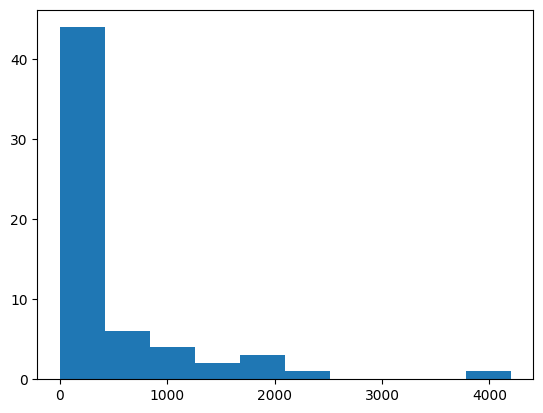

count     8.000000
mean     10.750000
std      12.578326
min       1.000000
25%       3.000000
50%       7.500000
75%      11.000000
max      40.000000
Name: age, dtype: float64


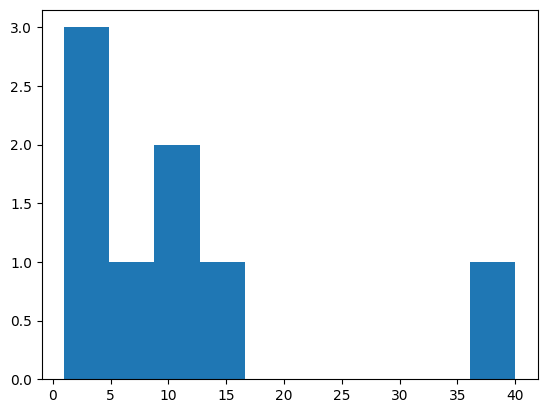

In [26]:
print(df['price'].describe())
df['price'].hist(grid=False)
plt.show()
print(df['age'].describe())
df['age'].hist(grid=False)
plt.show()

In [27]:
df.loc[:,['price','brand']].groupby('brand').describe()

price                                                             \
          count         mean         std     min      25%     50%      75%   
brand                                                                        
electra     1.0   200.000000         NaN   200.0   200.00   200.0   200.00   
framed      1.0  1000.000000         NaN  1000.0  1000.00  1000.0  1000.00   
garneau     1.0  1200.000000         NaN  1200.0  1200.00  1200.0  1200.00   
missing    48.0   418.895833  781.343830     0.0    71.25   115.0   281.25   
panasonic   1.0   450.000000         NaN   450.0   450.00   450.0   450.00   
pivot       2.0   750.000000    0.000000   750.0   750.00   750.0   750.00   
rallye      1.0    85.000000         NaN    85.0    85.00    85.0    85.00   
surly       1.0  1500.000000         NaN  1500.0  1500.00  1500.0  1500.00   
trek        5.0   620.000000  774.273853   100.0   150.00   250.0   650.00   

                   
              max  
brand              
electra     200.0  
framed     1000.0  
garneau    1200.0  
missing    4200.0  
panasonic   450.0  
pivot       750.0  
rallye       85.0  
surly      1500.0  
trek       1950.0